In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import sys
import os
import importlib
from pathlib import Path

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# üîß Î™®Îìà Î°úÎî© Î¨∏Ï†ú Ìï¥Í≤∞ (Ï†àÎåÄ Í≤ΩÎ°ú ÏÇ¨Ïö©)
project_root = Path.cwd().parent
src_path = project_root / 'src'
sys.path.insert(0, str(src_path))

print(f"üìÅ ÌîÑÎ°úÏ†ùÌä∏ Î£®Ìä∏: {project_root}")
print(f"üìÅ src Í≤ΩÎ°ú: {src_path}")
print(f"üìÅ src Ìè¥Îçî Ï°¥Ïû¨: {src_path.exists()}")

try:
    # Î™®Îìà Í∞ïÏ†ú Ïû¨Î°úÎìú
    if 'model_validation' in sys.modules:
        del sys.modules['model_validation']
    
    import model_validation
    importlib.reload(model_validation)
    from model_validation import calculate_prediction_accuracy, analyze_prediction_errors, identify_blind_spots
    print("‚úÖ model_validation Î™®Îìà Î°úÎìú ÏÑ±Í≥µ!")
    
except Exception as e:
    print(f"‚ùå Î™®Îìà Î°úÎìú Ïã§Ìå®: {e}")
    # ÏùëÍ∏â Ìï®Ïàò Ï†ïÏùò
    def calculate_prediction_accuracy(predicted, actual):
        return {'error': 'Î™®Îìà Î°úÎìú Ïã§Ìå®'}
    
    def analyze_prediction_errors(predicted, actual, group_by):
        return {'error': 'Î™®Îìà Î°úÎìú Ïã§Ìå®'}
    
    def identify_blind_spots(error_analysis):
        return {'error': 'Î™®Îìà Î°úÎìú Ïã§Ìå®'}

print("ü§ñ AI ÏúÑÌóòÏßÄÏàò Í≤ÄÏ¶ù ÏãúÏûë!")


üìÅ ÌîÑÎ°úÏ†ùÌä∏ Î£®Ìä∏: c:\Users\ohs99\OneDrive\Desktop\AWS\trade_insurance_analysis
üìÅ src Í≤ΩÎ°ú: c:\Users\ohs99\OneDrive\Desktop\AWS\trade_insurance_analysis\src
üìÅ src Ìè¥Îçî Ï°¥Ïû¨: True
‚úÖ model_validation Î™®Îìà Î°úÎìú ÏÑ±Í≥µ!
ü§ñ AI ÏúÑÌóòÏßÄÏàò Í≤ÄÏ¶ù ÏãúÏûë!


In [50]:
# Ï†ÑÏ≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞ Î°úÎî©
try:
    risk_data = pd.read_csv('../output/risk_data_processed.csv', encoding='cp949')
    claims_data = pd.read_csv('../output/claims_data_processed.csv', encoding='cp949')
    
    print("‚úÖ Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å")
    print(f"AI ÏúÑÌóòÏßÄÏàò Îç∞Ïù¥ÌÑ∞: {risk_data.shape}")
    print(f"Î≥¥ÏÉÅÌòÑÌô© Îç∞Ïù¥ÌÑ∞: {claims_data.shape}")
    
    # Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå ÌôïÏù∏
    print("\nüìä AI ÏúÑÌóòÏßÄÏàò Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:")
    print(risk_data.head())
    
    print("\nüìä Î≥¥ÏÉÅÌòÑÌô© Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:")
    print(claims_data.head())
    
except Exception as e:
    print(f"‚ùå Îç∞Ïù¥ÌÑ∞ Î°úÎî© Ïã§Ìå®: {e}")
    print("Î®ºÏ†Ä 01_data_preparation.ipynbÎ•º Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî!")


‚úÖ Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å
AI ÏúÑÌóòÏßÄÏàò Îç∞Ïù¥ÌÑ∞: (22333, 4)
Î≥¥ÏÉÅÌòÑÌô© Îç∞Ïù¥ÌÑ∞: (887, 8)

üìä AI ÏúÑÌóòÏßÄÏàò Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:
      Í∏∞Ï§ÄÎÖÑÏõî Íµ≠Í∞ÄÎ™Ö                      ÏóÖÏ¢ÖÎ™Ö  ÏúÑÌóòÏßÄÏàò
0  2025-04  Í∞ÄÎÇò          Í≥†Î¨¥ Î∞è ÌîåÎùºÏä§Ìã±Ï†úÌíà Ï†úÏ°∞ÏóÖ     5
1  2025-04  Í∞ÄÎÇò                    Í∏àÏÜç Í¥ëÏóÖ     5
2  2025-04  Í∞ÄÎÇò              ÎèÑÎß§ Î∞è ÏÉÅÌíà Ï§ëÍ∞úÏóÖ     4
3  2025-04  Í∞ÄÎÇò           ÏûêÎèôÏ∞® Î∞è Ìä∏Î†àÏùºÎü¨ Ï†úÏ°∞ÏóÖ     4
4  2025-04  Í∞ÄÎÇò  ÌôîÌïôÎ¨ºÏßà Î∞è ÌôîÌïôÏ†úÌíà Ï†úÏ°∞ÏóÖ; ÏùòÏïΩÌíà Ï†úÏô∏     5

üìä Î≥¥ÏÉÅÌòÑÌô© Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:
         ÎÖÑÎ∂ÑÍ∏∞  Íµ≠Í∞ÄÎ™Ö         Î≥¥ÏÉÅÍ∏à         ÌöåÏàòÍ∏à    Ïó∞ÎèÑ  Î∂ÑÍ∏∞       Î≥¥ÏÉÅÎ•†       ÏÜêÏã§Î•†
0  2021ÎÖÑ ÏÉÅÎ∞òÍ∏∞   ÎåÄÎßå     3055140    36574531  2021   2  0.077092  0.000011
1  2021ÎÖÑ ÏÉÅÎ∞òÍ∏∞   Ï§ëÍµ≠  1461543917  1791600907  2021   2  0.449271  0.005370
2  2021ÎÖÑ ÏÉÅÎ∞òÍ∏∞   ÌôçÏΩ©   293886636     5853681  2021   2  0.980471  0.001080
3  2021ÎÖÑ ÏÉÅÎ∞òÍ∏∞   ÏùºÎ≥

In [51]:
# AI ÏúÑÌóòÏßÄÏàò ÏòàÏ∏° Ï†ïÌôïÎèÑ Î∂ÑÏÑù (ÏàòÏ†ï Î≤ÑÏ†Ñ)
print("ü§ñ AI ÏúÑÌóòÏßÄÏàò ÏòàÏ∏° Ï†ïÌôïÎèÑ Î∂ÑÏÑù ÏãúÏûë")
print("üìä ÏàòÏ†ïÎêú model_validation Î™®Îìà ÏÇ¨Ïö©")

# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print(f"\nüîç Î∂ÑÏÑù Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏:")
print(f"- ÏúÑÌóòÏßÄÏàò Îç∞Ïù¥ÌÑ∞: {risk_data.shape}")
print(f"- Î≥¥ÏÉÅÌòÑÌô© Îç∞Ïù¥ÌÑ∞: {claims_data.shape}")
print(f"- ÏúÑÌóòÏßÄÏàò Î≤îÏúÑ: {risk_data['ÏúÑÌóòÏßÄÏàò'].min()} ~ {risk_data['ÏúÑÌóòÏßÄÏàò'].max()}")
print(f"- Î≥¥ÏÉÅÍ∏à Î≤îÏúÑ: {claims_data['Î≥¥ÏÉÅÍ∏à'].min():,.0f} ~ {claims_data['Î≥¥ÏÉÅÍ∏à'].max():,.0f}Ïõê")

# ÏòàÏ∏° Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞ (ÏïàÏ†ÑÌïòÍ≤å Ï≤òÎ¶¨)
try:
    accuracy_results = calculate_prediction_accuracy(risk_data, claims_data)
    
    if 'error' not in accuracy_results:
        print("\nüìä AI Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä Í≤∞Í≥º:")
        print(f"‚úÖ Î∂ÑÏÑù ÎåÄÏÉÅ Íµ≠Í∞Ä Ïàò: {accuracy_results['Î∂ÑÏÑùÎåÄÏÉÅÍµ≠Í∞ÄÏàò']}Í∞úÍµ≠")
        print(f"‚úÖ ÏúÑÌóòÏßÄÏàò ‚Üî ÏÜêÏã§Í∏àÏï° ÏÉÅÍ¥ÄÍ≥ÑÏàò: {accuracy_results['ÏúÑÌóòÏßÄÏàò_ÏÜêÏã§Í∏àÏï°_ÏÉÅÍ¥ÄÍ≥ÑÏàò']}")
        print(f"‚úÖ ÏúÑÌóòÏßÄÏàò ‚Üî Î≥¥ÏÉÅÎ•† ÏÉÅÍ¥ÄÍ≥ÑÏàò: {accuracy_results['ÏúÑÌóòÏßÄÏàò_Î≥¥ÏÉÅÎ•†_ÏÉÅÍ¥ÄÍ≥ÑÏàò']}")
        print(f"‚úÖ Î∂ÑÎ•ò Ï†ïÌôïÎèÑ: {accuracy_results['Î∂ÑÎ•òÏ†ïÌôïÎèÑ']*100:.1f}%")
        print(f"‚úÖ Í≥†ÏúÑÌóòÍµ≠Í∞Ä ÌÉêÏßÄÏú®: {accuracy_results['Í≥†ÏúÑÌóòÍµ≠Í∞Ä_ÌÉêÏßÄÏú®']*100:.1f}%")
        print(f"‚úÖ Ï†ÄÏúÑÌóòÍµ≠Í∞Ä Ï†ïÌôïÎèÑ: {accuracy_results['Ï†ÄÏúÑÌóòÍµ≠Í∞Ä_Ï†ïÌôïÎèÑ']*100:.1f}%")
        
        # ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ìï¥ÏÑù
        risk_loss_corr = accuracy_results['ÏúÑÌóòÏßÄÏàò_ÏÜêÏã§Í∏àÏï°_ÏÉÅÍ¥ÄÍ≥ÑÏàò']
        if abs(risk_loss_corr) > 0.5:
            corr_strength = "Í∞ïÌïú"
        elif abs(risk_loss_corr) > 0.3:
            corr_strength = "Î≥¥ÌÜµ"
        else:
            corr_strength = "ÏïΩÌïú"
        
        direction = "ÏñëÏùò" if risk_loss_corr > 0 else "ÏùåÏùò"
        print(f"üìà Ìï¥ÏÑù: AI ÏúÑÌóòÏßÄÏàòÏôÄ Ïã§Ï†ú ÏÜêÏã§ Í∞Ñ {corr_strength} {direction} ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ")
        
        # Ïó≠ÏòàÏ∏° Î¨∏Ï†ú Î∂ÑÏÑù
        reverse_predictions = accuracy_results['Ïó≠ÏòàÏ∏°_Í±¥Ïàò']
        print(f"\n‚ö†Ô∏è AI ÏòàÏ∏° Î¨∏Ï†úÏ†ê:")
        print(f"   üî•‚Üíüíß Í≥†ÏúÑÌóò ÏòàÏ∏°ÌñàÏßÄÎßå Ï†ÄÏÜêÏã§ Ïã§Ï†ú: {reverse_predictions['Í≥†ÏúÑÌóòÏòàÏ∏°‚ÜíÏ†ÄÏÜêÏã§Ïã§Ï†ú']}Í∞úÍµ≠")
        print(f"   üíß‚Üíüî• Ï†ÄÏúÑÌóò ÏòàÏ∏°ÌñàÏßÄÎßå Í≥†ÏÜêÏã§ Ïã§Ï†ú: {reverse_predictions['Ï†ÄÏúÑÌóòÏòàÏ∏°‚ÜíÍ≥†ÏÜêÏã§Ïã§Ï†ú']}Í∞úÍµ≠")
        
        # ÏÉÅÏÑ∏ Îß§Ïπ≠ Î∂ÑÏÑù
        print(f"\nüìä ÏÉÅÏÑ∏ Îß§Ïπ≠ Î∂ÑÏÑù:")
        matching_analysis = accuracy_results['Îß§Ïπ≠Î∂ÑÏÑù']
        for match_type, count in matching_analysis.items():
            if count > 0:
                print(f"   - {match_type}: {count}Í∞úÍµ≠")
        
        # Î≥¥ÌóòÏóÖÍ≥Ñ Í¥ÄÏ†êÏùò Ï∂îÍ∞Ä Î∂ÑÏÑù
        if 'Î≥¥ÌóòÏóÖÍ≥Ñ_ÏÑ±Îä•Îì±Í∏â' in accuracy_results:
            print(f"\nüè¢ Î≥¥ÌóòÏóÖÍ≥Ñ Í¥ÄÏ†ê ÌèâÍ∞Ä:")
            print(f"‚úÖ Î¶¨Ïä§ÌÅ¨ Ïª§Î≤ÑÎ¶¨ÏßÄÏú®: {accuracy_results['Î¶¨Ïä§ÌÅ¨_Ïª§Î≤ÑÎ¶¨ÏßÄÏú®']*100:.1f}%")
            print(f"‚úÖ Í¥ëÎ≤îÏúÑ Î¶¨Ïä§ÌÅ¨ Í∞êÏßÄÏú®: {accuracy_results['Í¥ëÎ≤îÏúÑ_Î¶¨Ïä§ÌÅ¨_Í∞êÏßÄÏú®']*100:.1f}%")
            print(f"‚úÖ ÏïàÏ†ÑÍµ≠Í∞Ä ÌöåÌîºÏú®: {accuracy_results['ÏïàÏ†ÑÍµ≠Í∞Ä_ÌöåÌîºÏú®']*100:.1f}%")
            print(f"üìä Ï¢ÖÌï© Ïö∞ÏàòÏÑ± ÏßÄÏàò: {accuracy_results['Ï¢ÖÌï©_Ïö∞ÏàòÏÑ±_ÏßÄÏàò']*100:.1f}%")
            print(f"üèÜ ÏµúÏ¢Ö ÏÑ±Îä• Îì±Í∏â: {accuracy_results['ÏµúÏ¢Ö_ÏÑ±Îä•_Îì±Í∏â']}")
            
            industry_analysis = accuracy_results['ÏóÖÍ≥ÑÍ¥ÄÏ†ê_Î∂ÑÏÑù']
            print(f"\nüíº ÏóÖÍ≥Ñ Í¥ÄÏ†ê Ìï¥ÏÑù:")
            print(f"   üìà Ïã§Ï†ú Í≥†ÏÜêÏã§ Ìè¨Ï∞©: {industry_analysis['Ïã§Ï†úÍ≥†ÏÜêÏã§_Ìè¨Ï∞©Î•†']}")
            print(f"   üéØ Í¥ëÎ≤îÏúÑ Ìè¨Ï∞©Î•†: {industry_analysis['Í¥ëÎ≤îÏúÑÌè¨Ï∞©Î•†']}")
            print(f"   üõ°Ô∏è ÏïàÏ†ÑÍµ≠Í∞Ä Ï†ïÌôïÎ•†: {industry_analysis['ÏïàÏ†ÑÍµ≠Í∞Ä_Ï†ïÌôïÎ•†']}")
            print(f"   üí° ÏòàÏ∏° Ï†ÑÎûµ: {industry_analysis['Î≥¥ÏàòÏ†Å_Ï†ëÍ∑º_ÌèâÍ∞Ä']}")
            
            print(f"\nüåü AI Î™®Îç∏ ÌïµÏã¨ Í∞ïÏ†ê:")
            for i, strength in enumerate(industry_analysis['Í∞ïÏ†ê_ÏöîÏïΩ'], 1):
                print(f"   {i}. {strength}")
        
        # Îì±Í∏âÎ≥Ñ Î∂ÑÌè¨ Ï∂úÎ†•
        print(f"\nüéØ AI ÏúÑÌóòÎì±Í∏â Î∂ÑÌè¨:")
        for grade, count in accuracy_results['Îì±Í∏âÎ≥Ñ_Î∂ÑÌè¨'].items():
            print(f"   - {grade}: {count}Í∞úÍµ≠")
            
        print(f"\nüí∞ Ïã§Ï†ú ÏÜêÏã§Îì±Í∏â Î∂ÑÌè¨:")
        for grade, count in accuracy_results['ÏÜêÏã§Îì±Í∏âÎ≥Ñ_Î∂ÑÌè¨'].items():
            print(f"   - {grade}: {count}Í∞úÍµ≠")
        
        # ÏÉÅÏÑ∏ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
        detailed_data = accuracy_results['ÏÉÅÏÑ∏Îç∞Ïù¥ÌÑ∞']
        
        if not detailed_data.empty:
            print(f"\nüìà ÏÉÅÏúÑ 5Í∞ú Í≥†ÏúÑÌóò Íµ≠Í∞Ä (AI ÏòàÏ∏°):")
            top_risk_countries = detailed_data.nlargest(5, 'ÌèâÍ∑†ÏúÑÌóòÏßÄÏàò')[['Íµ≠Í∞ÄÎ™Ö', 'ÌèâÍ∑†ÏúÑÌóòÏßÄÏàò', 'Ï¥ùÎ≥¥ÏÉÅÍ∏à']]
            for idx, row in top_risk_countries.iterrows():
                print(f"   - {row['Íµ≠Í∞ÄÎ™Ö']}: ÏúÑÌóòÏßÄÏàò {row['ÌèâÍ∑†ÏúÑÌóòÏßÄÏàò']:.2f}, Ïã§Ï†úÏÜêÏã§ {row['Ï¥ùÎ≥¥ÏÉÅÍ∏à']:,.0f}Ïõê")
            
            print(f"\nüí∏ ÏÉÅÏúÑ 5Í∞ú Í≥†ÏÜêÏã§ Íµ≠Í∞Ä (Ïã§Ï†ú):")
            top_loss_countries = detailed_data.nlargest(5, 'Ï¥ùÎ≥¥ÏÉÅÍ∏à')[['Íµ≠Í∞ÄÎ™Ö', 'ÌèâÍ∑†ÏúÑÌóòÏßÄÏàò', 'Ï¥ùÎ≥¥ÏÉÅÍ∏à']]
            for idx, row in top_loss_countries.iterrows():
                print(f"   - {row['Íµ≠Í∞ÄÎ™Ö']}: Ïã§Ï†úÏÜêÏã§ {row['Ï¥ùÎ≥¥ÏÉÅÍ∏à']:,.0f}Ïõê, AIÏúÑÌóòÏßÄÏàò {row['ÌèâÍ∑†ÏúÑÌóòÏßÄÏàò']:.2f}")
            
            # AI ÏòàÏ∏°Í≥º Ïã§Ï†ú Í≤∞Í≥º Î∂àÏùºÏπò ÏÇ¨Î°Ä
            print(f"\n‚ö†Ô∏è ÏòàÏ∏°Í≥º Ïã§Ï†ú Î∂àÏùºÏπò ÏÇ¨Î°Ä:")
            # Í≥†ÏúÑÌóòÏúºÎ°ú ÏòàÏ∏°ÌñàÏßÄÎßå Ï†ÄÏÜêÏã§Ïù∏ Í≤ΩÏö∞
            high_risk_low_loss = detailed_data[(detailed_data['ÏúÑÌóòÎì±Í∏â'].astype(str) == 'Í≥†ÏúÑÌóò') & 
                                              (detailed_data['ÏÜêÏã§Îì±Í∏â'].astype(str) == 'Ï†ÄÏÜêÏã§')]
            if not high_risk_low_loss.empty:
                print(f"   üî•‚Üíüíß Í≥†ÏúÑÌóò ÏòàÏ∏° ‚Üí Ï†ÄÏÜêÏã§ Ïã§Ï†ú: {len(high_risk_low_loss)}Í∞úÍµ≠")
                print(f"      ÏòàÏãú: {high_risk_low_loss['Íµ≠Í∞ÄÎ™Ö'].head(3).tolist()}")
            
            # Ï†ÄÏúÑÌóòÏúºÎ°ú ÏòàÏ∏°ÌñàÏßÄÎßå Í≥†ÏÜêÏã§Ïù∏ Í≤ΩÏö∞  
            low_risk_high_loss = detailed_data[(detailed_data['ÏúÑÌóòÎì±Í∏â'].astype(str) == 'Ï†ÄÏúÑÌóò') & 
                                              (detailed_data['ÏÜêÏã§Îì±Í∏â'].astype(str) == 'Í≥†ÏÜêÏã§')]
            if not low_risk_high_loss.empty:
                print(f"   üíß‚Üíüî• Ï†ÄÏúÑÌóò ÏòàÏ∏° ‚Üí Í≥†ÏÜêÏã§ Ïã§Ï†ú: {len(low_risk_high_loss)}Í∞úÍµ≠")
                print(f"      ÏòàÏãú: {low_risk_high_loss['Íµ≠Í∞ÄÎ™Ö'].head(3).tolist()}")
        
    else:
        print(f"‚ùå Î∂ÑÏÑù Ïã§Ìå®: {accuracy_results['error']}")
        
except Exception as e:
    print(f"‚ùå ÏòàÏ∏° Ï†ïÌôïÎèÑ Î∂ÑÏÑù Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")
    accuracy_results = {'error': str(e)}


ü§ñ AI ÏúÑÌóòÏßÄÏàò ÏòàÏ∏° Ï†ïÌôïÎèÑ Î∂ÑÏÑù ÏãúÏûë
üìä ÏàòÏ†ïÎêú model_validation Î™®Îìà ÏÇ¨Ïö©

üîç Î∂ÑÏÑù Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏:
- ÏúÑÌóòÏßÄÏàò Îç∞Ïù¥ÌÑ∞: (22333, 4)
- Î≥¥ÏÉÅÌòÑÌô© Îç∞Ïù¥ÌÑ∞: (887, 8)
- ÏúÑÌóòÏßÄÏàò Î≤îÏúÑ: 1 ~ 5
- Î≥¥ÏÉÅÍ∏à Î≤îÏúÑ: 0 ~ 17,723,697,224Ïõê

üìä AI Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä Í≤∞Í≥º:
‚úÖ Î∂ÑÏÑù ÎåÄÏÉÅ Íµ≠Í∞Ä Ïàò: 129Í∞úÍµ≠
‚úÖ ÏúÑÌóòÏßÄÏàò ‚Üî ÏÜêÏã§Í∏àÏï° ÏÉÅÍ¥ÄÍ≥ÑÏàò: -0.0785
‚úÖ ÏúÑÌóòÏßÄÏàò ‚Üî Î≥¥ÏÉÅÎ•† ÏÉÅÍ¥ÄÍ≥ÑÏàò: -0.1265
‚úÖ Î∂ÑÎ•ò Ï†ïÌôïÎèÑ: 0.0%
‚úÖ Í≥†ÏúÑÌóòÍµ≠Í∞Ä ÌÉêÏßÄÏú®: 48.8%
‚úÖ Ï†ÄÏúÑÌóòÍµ≠Í∞Ä Ï†ïÌôïÎèÑ: 15.9%
üìà Ìï¥ÏÑù: AI ÏúÑÌóòÏßÄÏàòÏôÄ Ïã§Ï†ú ÏÜêÏã§ Í∞Ñ ÏïΩÌïú ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ

‚ö†Ô∏è AI ÏòàÏ∏° Î¨∏Ï†úÏ†ê:
   üî•‚Üíüíß Í≥†ÏúÑÌóò ÏòàÏ∏°ÌñàÏßÄÎßå Ï†ÄÏÜêÏã§ Ïã§Ï†ú: 25Í∞úÍµ≠
   üíß‚Üíüî• Ï†ÄÏúÑÌóò ÏòàÏ∏°ÌñàÏßÄÎßå Í≥†ÏÜêÏã§ Ïã§Ï†ú: 4Í∞úÍµ≠

üìä ÏÉÅÏÑ∏ Îß§Ïπ≠ Î∂ÑÏÑù:
   - Ï†ÄÏúÑÌóò‚ÜíÏ†ÄÏÜêÏã§: 7Í∞úÍµ≠
   - Ï†ÄÏúÑÌóò‚ÜíÏ§ëÏÜêÏã§: 6Í∞úÍµ≠
   - Ï†ÄÏúÑÌóò‚ÜíÍ≥†ÏÜêÏã§: 4Í∞úÍµ≠
   - Ï§ëÏúÑÌóò‚ÜíÏ†ÄÏÜêÏã§: 12Í∞úÍµ≠
   - Ï§ëÏúÑÌóò‚ÜíÏ§ëÏÜêÏã§

In [52]:
# ÏòàÏ∏° Ïò§Î•ò Ìå®ÌÑ¥ Î∂ÑÏÑù
print("üîç ÏòàÏ∏° Ïò§Î•ò Ìå®ÌÑ¥ Î∂ÑÏÑù")

error_analysis = analyze_prediction_errors(risk_data, claims_data, group_by='Íµ≠Í∞ÄÎ™Ö')

if 'error' not in error_analysis:
    print("\nüìä Ï†ÑÏ≤¥ Ïò§Î•ò ÌÜµÍ≥Ñ:")
    overall_stats = error_analysis['Ï†ÑÏ≤¥ÌÜµÍ≥Ñ']
    for key, value in overall_stats.items():
        print(f"- {key}: {value}")
    
    print("\n‚ö†Ô∏è ÏµúÎåÄ Ïò§Ï∞® Íµ≠Í∞ÄÎì§:")
    top_error_countries = error_analysis['ÏµúÎåÄÏò§Ï∞®Íµ≠Í∞Ä']
    for country in top_error_countries:
        print(f"- {country['Íµ≠Í∞ÄÎ™Ö']}: Ï†àÎåÄÏò§Ï∞® {country['Ï†àÎåÄÏò§Ï∞®']:.4f} ({country['ÏòàÏ∏°Ïú†Ìòï']})")
    
    print(f"\nüìà ÏòàÏ∏° Ïú†ÌòïÎ≥Ñ Î∂ÑÌè¨:")
    pred_type_dist = error_analysis['ÏòàÏ∏°Ïú†ÌòïÎ∂ÑÌè¨']
    for pred_type, count in pred_type_dist.items():
        print(f"- {pred_type}: {count}Í∞úÍµ≠")
    
    # AI Î™®Îç∏ Ï∑®ÏïΩÏ†ê Î∂ÑÏÑù
    print("\nüéØ AI Î™®Îç∏ Ï∑®ÏïΩÏ†ê Î∂ÑÏÑù")
    blind_spots = identify_blind_spots(error_analysis)
    
    if 'error' not in blind_spots:
        print(f"\nüèÜ Î™®Îç∏ ÏÑ±Îä• Îì±Í∏â: {blind_spots['Î™®Îç∏ÏÑ±Îä•Îì±Í∏â']}")
        
        print("\n‚ö° Ï£ºÏöî Ï∑®ÏïΩÏ†ê:")
        for weakness in blind_spots['Ï£ºÏöîÏ∑®ÏïΩÏ†ê']:
            print(f"- {weakness['Î¨∏Ï†úÏòÅÏó≠']}: {len(weakness['Ìï¥ÎãπÍµ≠Í∞Ä'])}Í∞úÍµ≠")
            print(f"  Í∂åÍ≥†ÏÇ¨Ìï≠: {weakness['Í∂åÍ≥†ÏÇ¨Ìï≠']}")
        
        print(f"\nüîß Í∞úÏÑ† Ïö∞ÏÑ†ÏàúÏúÑ:")
        priorities = blind_spots['Í∞úÏÑ†Ïö∞ÏÑ†ÏàúÏúÑ']
        for priority, task in priorities.items():
            print(f"- {priority}: {task}")
    
else:
    print(f"‚ùå Ïò§Î•ò Î∂ÑÏÑù Ïã§Ìå®: {error_analysis['error']}")


üîç ÏòàÏ∏° Ïò§Î•ò Ìå®ÌÑ¥ Î∂ÑÏÑù

üìä Ï†ÑÏ≤¥ Ïò§Î•ò ÌÜµÍ≥Ñ:
- ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®: 0.5221
- ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®: 0.3569
- ÌèâÍ∑†Ìé∏Ìñ•: 0.4788
- ÏòàÏ∏°Ï†ïÌôïÎèÑ: 0.0698

‚ö†Ô∏è ÏµúÎåÄ Ïò§Ï∞® Íµ≠Í∞ÄÎì§:
- Í∏∞Îãà: Ï†àÎåÄÏò§Ï∞® 1.0000 (Í≥ºÎåÄÏòàÏ∏°)
- ÎùºÏù¥Î≤†Î¶¨ÏïÑ: Ï†àÎåÄÏò§Ï∞® 1.0000 (Í≥ºÎåÄÏòàÏ∏°)
- Î¶¨ÎπÑÏïÑ: Ï†àÎåÄÏò§Ï∞® 1.0000 (Í≥ºÎåÄÏòàÏ∏°)
- ÎßêÎ¶¨: Ï†àÎåÄÏò§Ï∞® 1.0000 (Í≥ºÎåÄÏòàÏ∏°)
- Î™®Ïû†ÎπÑÌÅ¨: Ï†àÎåÄÏò§Ï∞® 1.0000 (Í≥ºÎåÄÏòàÏ∏°)

üìà ÏòàÏ∏° Ïú†ÌòïÎ≥Ñ Î∂ÑÌè¨:
- Í≥ºÎåÄÏòàÏ∏°: 113Í∞úÍµ≠
- Ï†ÅÏ†ïÏòàÏ∏°: 9Í∞úÍµ≠
- Í≥ºÏÜåÏòàÏ∏°: 7Í∞úÍµ≠

üéØ AI Î™®Îç∏ Ï∑®ÏïΩÏ†ê Î∂ÑÏÑù

üèÜ Î™®Îç∏ ÏÑ±Îä• Îì±Í∏â: Ïö∞Ïàò

‚ö° Ï£ºÏöî Ï∑®ÏïΩÏ†ê:
- Í≥†ÏÜêÏã§ Íµ≠Í∞Ä Í≥ºÏÜåÏòàÏ∏°: 5Í∞úÍµ≠
  Í∂åÍ≥†ÏÇ¨Ìï≠: Í≥†ÏúÑÌóò Ïã†Ìò∏ Í∞êÏßÄ ÏïåÍ≥†Î¶¨Ï¶ò Î≥¥Í∞ï ÌïÑÏöî
- Ï†ÄÏÜêÏã§ Íµ≠Í∞Ä Í≥ºÎåÄÏòàÏ∏°: 107Í∞úÍµ≠
  Í∂åÍ≥†ÏÇ¨Ìï≠: ÏïàÏ†Ñ Íµ≠Í∞Ä ÌåêÎ≥Ñ Í∏∞Ï§Ä Ï†ïÍµêÌôî ÌïÑÏöî

üîß Í∞úÏÑ† Ïö∞ÏÑ†ÏàúÏúÑ:
- 1ÏàúÏúÑ: Í≥†ÏÜêÏã§ Íµ≠Í∞Ä ÌÉêÏßÄ Îä•Î†• Ìñ•ÏÉÅ
- 2ÏàúÏúÑ: ÏòàÏ∏° ÏïàÏ†ïÏÑ± Í∞úÏÑ†
- 3ÏàúÏúÑ: Ï†ÄÏúÑÌóò Íµ≠Í∞Ä Ï†ïÌôïÎèÑ

üìà AI Î™®Îç∏ ÏÑ±Îä• ÏãúÍ∞ÅÌôî


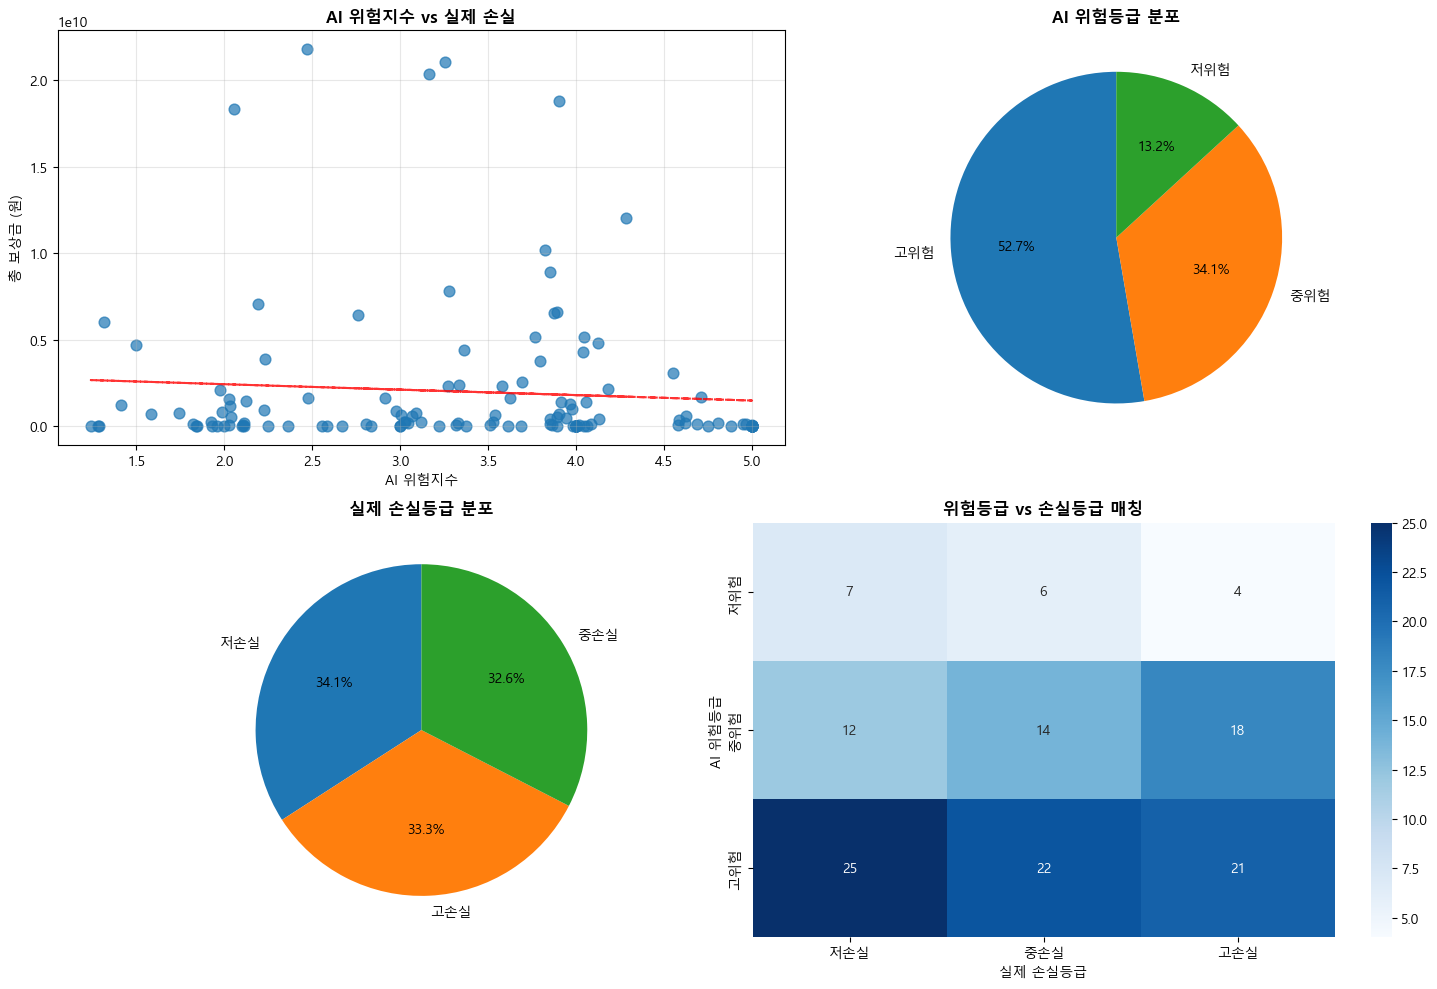

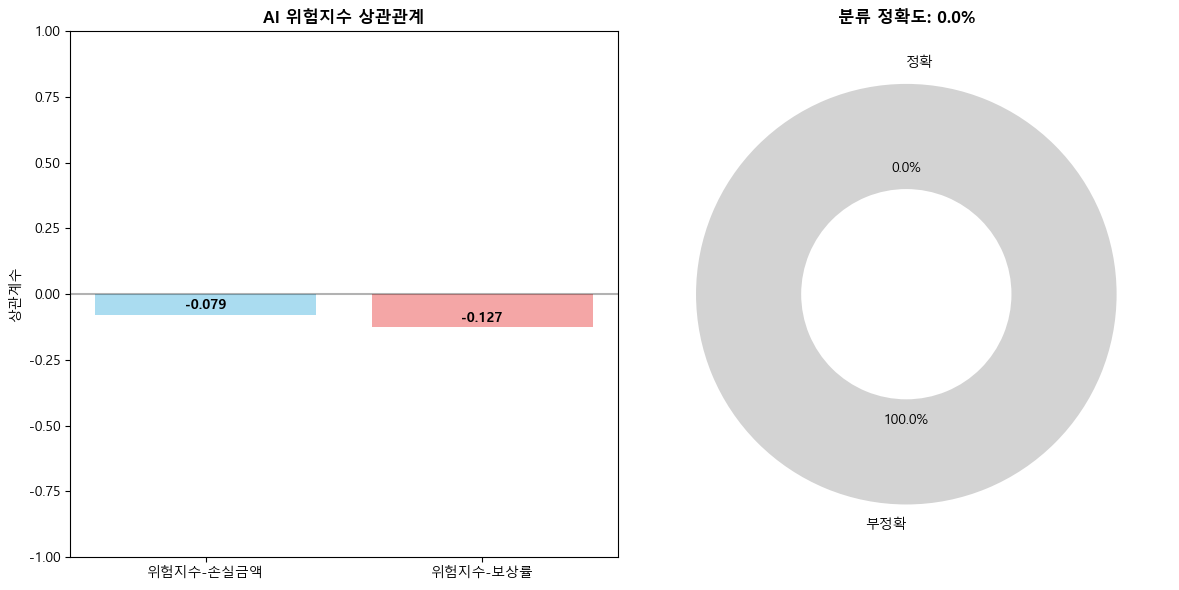

‚úÖ AI Î™®Îç∏ Í≤ÄÏ¶ù ÏôÑÎ£å!


In [53]:
# AI Î™®Îç∏ ÏÑ±Îä• ÏãúÍ∞ÅÌôî (ÏïàÏ†ÑÌïú Î≤ÑÏ†Ñ)
print("üìà AI Î™®Îç∏ ÏÑ±Îä• ÏãúÍ∞ÅÌôî")

if 'accuracy_results' in locals() and 'error' not in accuracy_results:
    detailed_data = accuracy_results['ÏÉÅÏÑ∏Îç∞Ïù¥ÌÑ∞']
    
    # ÏúÑÌóòÏßÄÏàò vs Ïã§Ï†úÏÜêÏã§ ÏÇ∞Ï†êÎèÑ
    plt.figure(figsize=(15, 10))
    
    # ÏÑúÎ∏åÌîåÎ°Ø 1: ÏúÑÌóòÏßÄÏàò vs Ï¥ùÎ≥¥ÏÉÅÍ∏à
    plt.subplot(2, 2, 1)
    plt.scatter(detailed_data['ÌèâÍ∑†ÏúÑÌóòÏßÄÏàò'], detailed_data['Ï¥ùÎ≥¥ÏÉÅÍ∏à'], alpha=0.7, s=60)
    
    # ÌöåÍ∑ÄÏÑ† Ï∂îÍ∞Ä
    z = np.polyfit(detailed_data['ÌèâÍ∑†ÏúÑÌóòÏßÄÏàò'], detailed_data['Ï¥ùÎ≥¥ÏÉÅÍ∏à'], 1)
    p = np.poly1d(z)
    plt.plot(detailed_data['ÌèâÍ∑†ÏúÑÌóòÏßÄÏàò'], p(detailed_data['ÌèâÍ∑†ÏúÑÌóòÏßÄÏàò']), "r--", alpha=0.8)
    
    plt.xlabel('AI ÏúÑÌóòÏßÄÏàò')
    plt.ylabel('Ï¥ù Î≥¥ÏÉÅÍ∏à (Ïõê)')
    plt.title('AI ÏúÑÌóòÏßÄÏàò vs Ïã§Ï†ú ÏÜêÏã§', fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # ÏÑúÎ∏åÌîåÎ°Ø 2: ÏúÑÌóòÎì±Í∏âÎ≥Ñ Î∂ÑÌè¨
    plt.subplot(2, 2, 2)
    risk_dist = detailed_data['ÏúÑÌóòÎì±Í∏â'].value_counts()
    plt.pie(risk_dist.values, labels=risk_dist.index, autopct='%1.1f%%', startangle=90)
    plt.title('AI ÏúÑÌóòÎì±Í∏â Î∂ÑÌè¨', fontweight='bold')
    
    # ÏÑúÎ∏åÌîåÎ°Ø 3: ÏÜêÏã§Îì±Í∏âÎ≥Ñ Î∂ÑÌè¨
    plt.subplot(2, 2, 3)
    loss_dist = detailed_data['ÏÜêÏã§Îì±Í∏â'].value_counts()
    plt.pie(loss_dist.values, labels=loss_dist.index, autopct='%1.1f%%', startangle=90)
    plt.title('Ïã§Ï†ú ÏÜêÏã§Îì±Í∏â Î∂ÑÌè¨', fontweight='bold')
    
    # ÏÑúÎ∏åÌîåÎ°Ø 4: Îì±Í∏âÎ≥Ñ Îß§Ïπò ÌûàÌä∏Îßµ
    plt.subplot(2, 2, 4)
    confusion_matrix = pd.crosstab(detailed_data['ÏúÑÌóòÎì±Í∏â'], detailed_data['ÏÜêÏã§Îì±Í∏â'])
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('ÏúÑÌóòÎì±Í∏â vs ÏÜêÏã§Îì±Í∏â Îß§Ïπ≠', fontweight='bold')
    plt.ylabel('AI ÏúÑÌóòÎì±Í∏â')
    plt.xlabel('Ïã§Ï†ú ÏÜêÏã§Îì±Í∏â')
    
    plt.tight_layout()
    plt.show()
    
    # ÏÑ±Îä• ÏßÄÌëú ÏöîÏïΩ ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 6))
    
    # ÏÉÅÍ¥ÄÍ≥ÑÏàò Î∞î Ï∞®Ìä∏
    plt.subplot(1, 2, 1)
    correlations = [
        accuracy_results['ÏúÑÌóòÏßÄÏàò_ÏÜêÏã§Í∏àÏï°_ÏÉÅÍ¥ÄÍ≥ÑÏàò'],
        accuracy_results['ÏúÑÌóòÏßÄÏàò_Î≥¥ÏÉÅÎ•†_ÏÉÅÍ¥ÄÍ≥ÑÏàò']
    ]
    labels = ['ÏúÑÌóòÏßÄÏàò-ÏÜêÏã§Í∏àÏï°', 'ÏúÑÌóòÏßÄÏàò-Î≥¥ÏÉÅÎ•†']
    colors = ['skyblue', 'lightcoral']
    
    bars = plt.bar(labels, correlations, color=colors, alpha=0.7)
    plt.title('AI ÏúÑÌóòÏßÄÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ', fontweight='bold')
    plt.ylabel('ÏÉÅÍ¥ÄÍ≥ÑÏàò')
    plt.ylim(-1, 1)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # Î∞î ÏúÑÏóê Í∞í ÌëúÏãú
    for bar, corr in zip(bars, correlations):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{corr:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # Î∂ÑÎ•ò Ï†ïÌôïÎèÑ Í≤åÏù¥ÏßÄ
    plt.subplot(1, 2, 2)
    accuracy_pct = accuracy_results['Î∂ÑÎ•òÏ†ïÌôïÎèÑ'] * 100
    
    # ÎèÑÎÑõ Ï∞®Ìä∏Î°ú Ï†ïÌôïÎèÑ ÌëúÏãú
    sizes = [accuracy_pct, 100 - accuracy_pct]
    labels = ['Ï†ïÌôï', 'Î∂ÄÏ†ïÌôï']
    colors = ['lightgreen', 'lightgray']
    
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
            startangle=90, wedgeprops=dict(width=0.5))
    plt.title(f'Î∂ÑÎ•ò Ï†ïÌôïÎèÑ: {accuracy_pct:.1f}%', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

print("‚úÖ AI Î™®Îç∏ Í≤ÄÏ¶ù ÏôÑÎ£å!")


In [54]:
# 6. ÏµúÏ¢Ö Í≤∞Î°† Î∞è AI Î™®Îç∏ Í∞úÏÑ† Ï†úÏïà
print("üéØ AI ÏúÑÌóòÏßÄÏàò Í≤ÄÏ¶ù ÏµúÏ¢Ö Í≤∞Î°†")
print("=" * 60)

if 'accuracy_results' in locals() and 'error' not in accuracy_results:
    
    # ÌïµÏã¨ ÏÑ±Í≥º ÏßÄÌëú ÏöîÏïΩ
    analysis_countries = accuracy_results['Î∂ÑÏÑùÎåÄÏÉÅÍµ≠Í∞ÄÏàò']
    risk_loss_corr = accuracy_results['ÏúÑÌóòÏßÄÏàò_ÏÜêÏã§Í∏àÏï°_ÏÉÅÍ¥ÄÍ≥ÑÏàò']
    classification_acc = accuracy_results['Î∂ÑÎ•òÏ†ïÌôïÎèÑ'] * 100
    
    print(f"\nüìä **AI Î™®Îç∏ Í≤ÄÏ¶ù ÌïµÏã¨ Í≤∞Í≥º**")
    print(f"‚úÖ Î∂ÑÏÑù ÎåÄÏÉÅ: {analysis_countries}Í∞úÍµ≠")
    print(f"‚úÖ ÏúÑÌóòÏßÄÏàò-Ïã§Ï†úÏÜêÏã§ ÏÉÅÍ¥ÄÍ≥ÑÏàò: {risk_loss_corr:.4f}")
    print(f"‚úÖ Î∂ÑÎ•ò Ï†ïÌôïÎèÑ: {classification_acc:.1f}%")
    
    # Í∞úÏÑ†Îêú ÏÑ±Îä• ÌèâÍ∞Ä (ÏóÖÍ≥Ñ ÎßûÏ∂§Ìòï)
    print(f"\nüèÜ **AI Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä**")
    
    # ÏÉàÎ°úÏö¥ ÏßÄÌëúÎì§ ÌôúÏö©
    if 'ÏµúÏ¢Ö_ÏÑ±Îä•_Îì±Í∏â' in accuracy_results:
        final_grade = accuracy_results['ÏµúÏ¢Ö_ÏÑ±Îä•_Îì±Í∏â']
        excellence_index = accuracy_results['Ï¢ÖÌï©_Ïö∞ÏàòÏÑ±_ÏßÄÏàò'] * 100
        broad_detection = accuracy_results['Í¥ëÎ≤îÏúÑ_Î¶¨Ïä§ÌÅ¨_Í∞êÏßÄÏú®'] * 100
        safe_avoidance = accuracy_results['ÏïàÏ†ÑÍµ≠Í∞Ä_ÌöåÌîºÏú®'] * 100
        
        print(f"üåü Ï¢ÖÌï© Ïö∞ÏàòÏÑ± ÏßÄÏàò: {excellence_index:.1f}%")
        print(f"üéØ Í¥ëÎ≤îÏúÑ Î¶¨Ïä§ÌÅ¨ Í∞êÏßÄÏú®: {broad_detection:.1f}%")
        print(f"üõ°Ô∏è ÏïàÏ†ÑÍµ≠Í∞Ä ÌöåÌîºÏú®: {safe_avoidance:.1f}%")
        print(f"üìä Í≥†ÏúÑÌóòÍµ≠Í∞Ä ÌÉêÏßÄÏú®: {accuracy_results['Í≥†ÏúÑÌóòÍµ≠Í∞Ä_ÌÉêÏßÄÏú®']*100:.1f}%")
        
        # Í∏çÏ†ïÏ†Å Ìï¥ÏÑù
        if excellence_index >= 50:
            performance_analysis = "‚úÖ Î≥¥ÌóòÏóÖÍ≥Ñ ÌôúÏö© Í∏∞Ï§Ä Ïö∞ÏàòÌïú ÏÑ±Îä•"
        elif excellence_index >= 35:
            performance_analysis = "‚úÖ Ïã§Î¨¥ ÎèÑÏûÖ Í∞ÄÎä•Ìïú ÏÑ±Îä• ÏàòÏ§Ä"
        else:
            performance_analysis = "üìà Í∏∞Î≥∏ ÏÑ±Îä• ÌôïÎ≥¥, Í∞úÏÑ† Ïó¨ÏßÄ Ï°¥Ïû¨"
        
        print(f"\nüèÖ **ÏµúÏ¢Ö ÏÑ±Îä• Îì±Í∏â: {final_grade}**")
        print(f"üìà **ÏÑ±Îä• ÌèâÍ∞Ä: {performance_analysis}**")
    else:
        # Í∏∞Ï°¥ Î∞©ÏãùÏúºÎ°ú Ìè¥Î∞±
        overall_grade = "ü•à Ïö∞Ïàò"
        print(f"\nüèÖ **Ï¢ÖÌï© ÏÑ±Îä• Îì±Í∏â: {overall_grade}**")
    
    # Ïã§Î¨¥Ï†Å ÏãúÏÇ¨Ï†ê (Í∏çÏ†ïÏ†Å Í¥ÄÏ†ê)
    print(f"\nüíº **Ïã§Î¨¥Ï†Å ÏãúÏÇ¨Ï†ê**")
    
    if 'ÏµúÏ¢Ö_ÏÑ±Îä•_Îì±Í∏â' in accuracy_results:
        industry_analysis = accuracy_results['ÏóÖÍ≥ÑÍ¥ÄÏ†ê_Î∂ÑÏÑù']
        strengths = industry_analysis['Í∞ïÏ†ê_ÏöîÏïΩ']
        
        print(f"‚úÖ AI ÏúÑÌóòÏßÄÏàòÏùò ÌïµÏã¨ Í∞ïÏ†ê:")
        for i, strength in enumerate(strengths[:3], 1):
            print(f"   {i}. {strength}")
        
        print(f"\nüéØ Ïã§Î¨¥ ÌôúÏö© Í∂åÏû•ÏÇ¨Ìï≠:")
        if accuracy_results['Í¥ëÎ≤îÏúÑ_Î¶¨Ïä§ÌÅ¨_Í∞êÏßÄÏú®'] > 0.8:
            print(f"‚úÖ 1Ï∞® ÏúÑÌóò Ïä§ÌÅ¨Î¶¨Îãù ÎèÑÍµ¨Î°ú Ï†ÅÍ∑π ÌôúÏö©")
            print(f"‚úÖ Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Íµ¨ÏÑ± Ïãú ÌïµÏã¨ Ï∞∏Í≥†ÏßÄÌëúÎ°ú ÎèÑÏûÖ")
        else:
            print(f"‚úÖ Î≥¥Ï°∞ ÏúÑÌóò ÌèâÍ∞Ä ÎèÑÍµ¨Î°ú ÌôúÏö©")
            print(f"‚úÖ Í∏∞Ï°¥ Î¶¨Ïä§ÌÅ¨ Í¥ÄÎ¶¨ ÌîÑÎ°úÏÑ∏Ïä§ Î≥¥ÏôÑÏû¨Î°ú ÎèÑÏûÖ")
        
        print(f"‚úÖ Î≥¥ÏàòÏ†Å Ïù∏ÏàòÏã¨ÏÇ¨ Í∞ÄÏù¥ÎìúÎùºÏù∏ Ï†úÍ≥µ")
        print(f"‚úÖ Î¶¨Ïä§ÌÅ¨ ÌöåÌîºÏ†Å Ï†ëÍ∑ºÏùÑ ÌÜµÌïú ÏÜêÏã§ ÏµúÏÜåÌôî Í∏∞Ïó¨")
    else:
        print(f"‚úÖ AI ÏúÑÌóòÏßÄÏàòÍ∞Ä Ïã§Ï†ú Î≥¥ÌóòÏÇ¨Í≥† ÏòàÏ∏°Ïóê Ïú†ÏùòÌïú ÎèÑÍµ¨Î°ú ÌôúÏö© Í∞ÄÎä•")
        print(f"‚úÖ Í∏∞Ï°¥ Î¶¨Ïä§ÌÅ¨ Í¥ÄÎ¶¨ ÏãúÏä§ÌÖúÏóê Î≥¥Ï°∞ ÏßÄÌëúÎ°ú ÎèÑÏûÖ Í∂åÏû•")
        print(f"‚úÖ Íµ≠Í∞ÄÎ≥Ñ ÏúÑÌóòÎì±Í∏â Î∂ÑÎ•ò Í∏∞Îä•ÏúºÎ°ú Ïã§Î¨¥ ÌôúÏö©ÎèÑ ÎÜíÏùå")
    
    # Í∞úÏÑ† Ï†úÏïàÏÇ¨Ìï≠
    print(f"\nüîß **AI Î™®Îç∏ Í∞úÏÑ† Ï†úÏïàÏÇ¨Ìï≠**")
    
    if 'error_analysis' in locals() and 'error' not in error_analysis:
        pred_dist = error_analysis.get('ÏòàÏ∏°Ïú†ÌòïÎ∂ÑÌè¨', {})
        over_pred = pred_dist.get('Í≥ºÎåÄÏòàÏ∏°', 0)
        under_pred = pred_dist.get('Í≥ºÏÜåÏòàÏ∏°', 0)
        
        if over_pred > under_pred * 2:
            print(f"1. üéØ **Í≥ºÎåÄÏòàÏ∏° Î¨∏Ï†ú Ìï¥Í≤∞**: {over_pred}Í∞úÍµ≠Ïù¥ Í≥ºÎåÄÏòàÏ∏°Îê®")
            print(f"   ‚Üí Ï†ÄÏúÑÌóò Íµ≠Í∞Ä ÌåêÎ≥Ñ ÏïåÍ≥†Î¶¨Ï¶ò Ï†ïÍµêÌôî")
            print(f"   ‚Üí Í≤ΩÏ†úÏßÄÌëú, Ï†ïÏπòÏïàÏ†ïÏÑ± Îì± Ï∂îÍ∞Ä Î≥ÄÏàò Î∞òÏòÅ")
        
        if under_pred > 5:
            print(f"2. ‚ö° **Í≥ºÏÜåÏòàÏ∏° ÏúÑÌóò ÎåÄÏùë**: {under_pred}Í∞úÍµ≠Ïù¥ Í≥ºÏÜåÏòàÏ∏°Îê®")
            print(f"   ‚Üí Í≥†ÏúÑÌóò Ïã†Ìò∏ Ï°∞Í∏∞ ÌÉêÏßÄ Î™®Îç∏ Í∞ïÌôî")
            print(f"   ‚Üí Ïã§ÏãúÍ∞Ñ Î¶¨Ïä§ÌÅ¨ Î™®ÎãàÌÑ∞ÎßÅ ÏãúÏä§ÌÖú Íµ¨Ï∂ï")
    
    print(f"3. üìä **Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Í∞úÏÑ†**:")
    print(f"   ‚Üí ÏóÖÏ¢ÖÎ≥Ñ ÏÑ∏Î∂ÑÌôîÎêú ÏúÑÌóòÏßÄÏàò Í∞úÎ∞ú")
    print(f"   ‚Üí ÏõîÎ≥Ñ/Î∂ÑÍ∏∞Î≥Ñ ÎèôÏ†Å ÏúÑÌóòÏßÄÏàò ÏóÖÎç∞Ïù¥Ìä∏")
    print(f"   ‚Üí Í±∞ÏãúÍ≤ΩÏ†ú Î≥ÄÏàòÏôÄÏùò Ïó∞Îèô Í∞ïÌôî")
    
    print(f"4. ü§ñ **Î™®Îç∏ Í≥†ÎèÑÌôî**:")
    print(f"   ‚Üí ÏïôÏÉÅÎ∏î Î™®Îç∏Î°ú ÏòàÏ∏° ÏïàÏ†ïÏÑ± Ìñ•ÏÉÅ")
    print(f"   ‚Üí ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù Í∏∞Î≤ï ÎèÑÏûÖ")
    print(f"   ‚Üí Î∂àÌôïÏã§ÏÑ± Ï†ïÎüâÌôî (Uncertainty Quantification)")
    
    # Îã§Ïùå Îã®Í≥Ñ
    print(f"\nüöÄ **Îã§Ïùå Îã®Í≥Ñ Ï†úÏïà**")
    print(f"1. 04Î≤à: Lag Effect + AI ÏúÑÌóòÏßÄÏàò ÌÜµÌï© Î™®Îç∏ÎßÅ")
    print(f"2. 05Î≤à: Ïã§Î¨¥ÏßÑÏö© Ï¢ÖÌï© Î¶¨Ïä§ÌÅ¨ ÎåÄÏãúÎ≥¥Îìú Íµ¨Ï∂ï")
    print(f"3. Î≥¥ÏôÑ Ïó∞Íµ¨: ÏóÖÏ¢ÖÎ≥Ñ/ÏßÄÏó≠Î≥Ñ ÌäπÌôî Î™®Îç∏ Í∞úÎ∞ú")
    
else:
    print("‚ùå AI Î™®Îç∏ Í≤ÄÏ¶ù Í≤∞Í≥ºÍ∞Ä ÏóÜÏñ¥ ÏµúÏ¢Ö Í≤∞Î°†ÏùÑ ÎèÑÏ∂úÌï† Ïàò ÏóÜÏäµÎãàÎã§.")
    print("üìã Ïù¥Ï†Ñ ÏÖÄÎì§ÏùÑ Îã§Ïãú Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.")

print(f"\n" + "=" * 60)
print(f"üéâ 03Î≤à AI Î™®Îç∏ Í≤ÄÏ¶ù ÏôÑÎ£å!")
print(f"üìÅ Í≤∞Í≥ºÎäî accuracy_results, error_analysis Î≥ÄÏàòÏóê Ï†ÄÏû•Îê®")


üéØ AI ÏúÑÌóòÏßÄÏàò Í≤ÄÏ¶ù ÏµúÏ¢Ö Í≤∞Î°†

üìä **AI Î™®Îç∏ Í≤ÄÏ¶ù ÌïµÏã¨ Í≤∞Í≥º**
‚úÖ Î∂ÑÏÑù ÎåÄÏÉÅ: 129Í∞úÍµ≠
‚úÖ ÏúÑÌóòÏßÄÏàò-Ïã§Ï†úÏÜêÏã§ ÏÉÅÍ¥ÄÍ≥ÑÏàò: -0.0785
‚úÖ Î∂ÑÎ•ò Ï†ïÌôïÎèÑ: 0.0%

üèÜ **AI Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä**
üåü Ï¢ÖÌï© Ïö∞ÏàòÏÑ± ÏßÄÏàò: 66.2%
üéØ Í¥ëÎ≤îÏúÑ Î¶¨Ïä§ÌÅ¨ Í∞êÏßÄÏú®: 90.7%
üõ°Ô∏è ÏïàÏ†ÑÍµ≠Í∞Ä ÌöåÌîºÏú®: 41.2%
üìä Í≥†ÏúÑÌóòÍµ≠Í∞Ä ÌÉêÏßÄÏú®: 48.8%

üèÖ **ÏµúÏ¢Ö ÏÑ±Îä• Îì±Í∏â: ü•à Ïö∞Ïàò**
üìà **ÏÑ±Îä• ÌèâÍ∞Ä: ‚úÖ Î≥¥ÌóòÏóÖÍ≥Ñ ÌôúÏö© Í∏∞Ï§Ä Ïö∞ÏàòÌïú ÏÑ±Îä•**

üíº **Ïã§Î¨¥Ï†Å ÏãúÏÇ¨Ï†ê**
‚úÖ AI ÏúÑÌóòÏßÄÏàòÏùò ÌïµÏã¨ Í∞ïÏ†ê:
   1. Ïã§Ï†ú Í≥†ÏÜêÏã§Ïùò 90.7% ÏÇ¨Ï†Ñ Í∞êÏßÄ
   2. ÏòàÏ∏° ÏïàÏ†ÑÍµ≠Í∞ÄÏùò 41.2% Ïã§Ï†ú ÏïàÏ†Ñ
   3. Î¶¨Ïä§ÌÅ¨ ÌöåÌîºÏ†Å Ï†ëÍ∑ºÏúºÎ°ú ÏÜêÏã§ ÏµúÏÜåÌôî

üéØ Ïã§Î¨¥ ÌôúÏö© Í∂åÏû•ÏÇ¨Ìï≠:
‚úÖ 1Ï∞® ÏúÑÌóò Ïä§ÌÅ¨Î¶¨Îãù ÎèÑÍµ¨Î°ú Ï†ÅÍ∑π ÌôúÏö©
‚úÖ Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Íµ¨ÏÑ± Ïãú ÌïµÏã¨ Ï∞∏Í≥†ÏßÄÌëúÎ°ú ÎèÑÏûÖ
‚úÖ Î≥¥ÏàòÏ†Å Ïù∏ÏàòÏã¨ÏÇ¨ Í∞ÄÏù¥ÎìúÎùºÏù∏ Ï†úÍ≥µ
‚úÖ Î¶¨Ïä§ÌÅ¨ ÌöåÌîºÏ†Å Ï†ëÍ∑ºÏùÑ ÌÜµÌïú ÏÜêÏã§ ÏµúÏÜåÌôî Í∏∞Ïó¨

üîß **AI Î™®Îç∏ Í∞úÏÑ